# Librerías

In [ ]:
import numpy as np
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

from sklearn import model_selection
import xgboost as xgb

from scipy import stats
from datetime import datetime

In [3]:
df = pd.read_csv("data\datasetsemana.csv", index_col=0)

In [4]:
df

,id,item,category,department,store,store_code,region,date,unidades,event,year,yearweek,month,sell_price,precio_imputado,ganancias_semana
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-06,0,1,2011,201105,2,NaN,10.99,0.00
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-13,0,0,2011,201106,2,NaN,10.99,0.00
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-27,0,0,2011,201108,2,NaN,10.99,0.00
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-03-20,0,0,2011,201111,3,NaN,10.99,0.00
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-03-27,0,0,2011,201112,3,NaN,10.99,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177125,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-02-14,17,0,2016,201606,2,1.20,1.20,20.40
4177126,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-02-21,9,0,2016,201607,2,1.20,1.20,10.80
4177127,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-03-20,15,0,2016,201611,3,1.20,1.20,18.00
4177128,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-10,8,0,2016,201614,4,1.20,1.20,9.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4177130 entries, 0 to 4177129
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                object 
 1   item              object 
 2   category          object 
 3   department        object 
 4   store             object 
 5   store_code        object 
 6   region            object 
 7   date              object 
 8   unidades          int64  
 9   event             int64  
 10  year              int64  
 11  yearweek          int64  
 12  month             int64  
 13  sell_price        float64
 14  precio_imputado   float64
 15  ganancias_semana  float64
dtypes: float64(3), int64(5), object(8)
memory usage: 541.8+ MB


In [6]:
df.isnull().sum()

id                       0
item                     0
category                 0
department               0
store                    0
store_code               0
region                   0
date                     0
unidades                 0
event                    0
year                     0
yearweek                 0
month                    0
sell_price          894745
precio_imputado          0
ganancias_semana         0
dtype: int64

In [8]:
df["date"] = pd.to_datetime(df["date"], format = "%Y-%m-%d")

In [9]:
df

,id,item,category,department,store,store_code,region,date,unidades,event,year,yearweek,month,precio_imputado,ganancias_semana
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-06,0,1,2011,201105,2,10.99,0.00
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-13,0,0,2011,201106,2,10.99,0.00
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-27,0,0,2011,201108,2,10.99,0.00
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-03-20,0,0,2011,201111,3,10.99,0.00
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-03-27,0,0,2011,201112,3,10.99,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177125,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-02-14,17,0,2016,201606,2,1.20,20.40
4177126,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-02-21,9,0,2016,201607,2,1.20,10.80
4177127,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-03-20,15,0,2016,201611,3,1.20,18.00
4177128,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-10,8,0,2016,201614,4,1.20,9.60


In [10]:
df.isnull().sum()

id                  0
item                0
category            0
department          0
store               0
store_code          0
region              0
date                0
unidades            0
event               0
year                0
yearweek            0
month               0
precio_imputado     0
ganancias_semana    0
dtype: int64

In [11]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,4177130,2013-09-11 13:51:12.863328256,2011-01-30 00:00:00,2012-05-20 00:00:00,2013-09-15 00:00:00,2015-01-04 00:00:00,2016-04-24 00:00:00,NaN
unidades,"4,177,130.00",7.86,0.00,0.00,2.00,7.00,"3,976.00",23.58
event,"4,177,130.00",0.09,0.00,0.00,0.00,0.00,1.00,0.29
year,"4,177,130.00","2,013.21","2,011.00","2,012.00","2,013.00","2,015.00","2,016.00",1.53
yearweek,"4,177,130.00","201,346.05","201,104.00","201,220.00","201,336.00","201,500.00","201,616.00",151.68
month,"4,177,130.00",6.34,1.00,3.00,6.00,9.00,12.00,3.46
precio_imputado,"4,177,130.00",5.56,0.01,2.62,4.18,7.18,134.15,4.55
ganancias_semana,"4,177,130.00",27.63,0.00,0.00,7.90,30.10,"6,968.46",69.35


In [12]:
df.describe(include=object).T

,count,unique,top,freq
id,4177130,30490,SUPERMARKET_3_556_BOS_1,170
item,4177130,3049,SUPERMARKET_2_179,1472
category,4177130,3,SUPERMARKET,1968331
department,4177130,7,SUPERMARKET_3,1127930
store,4177130,10,South_End,417713
store_code,4177130,10,BOS_1,417713
region,4177130,3,New York,1670852


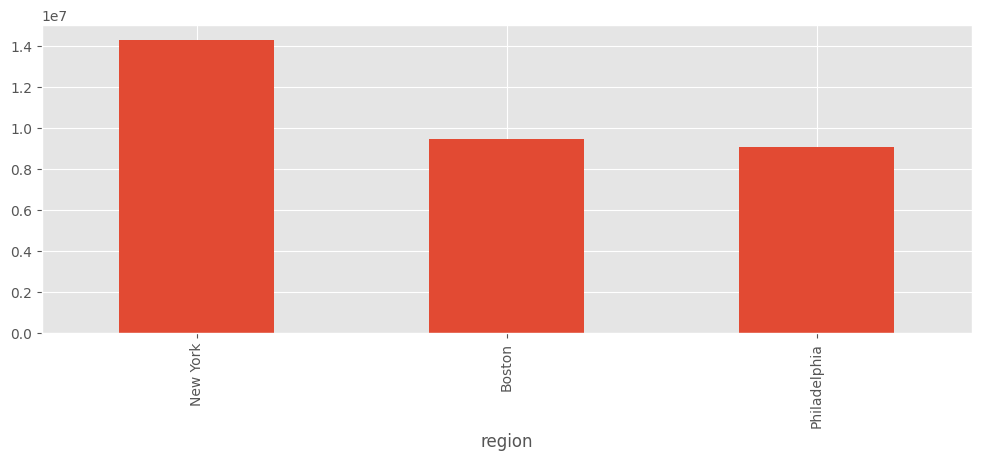

In [13]:
(
    df.
    groupby(["region"])
    ["unidades"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

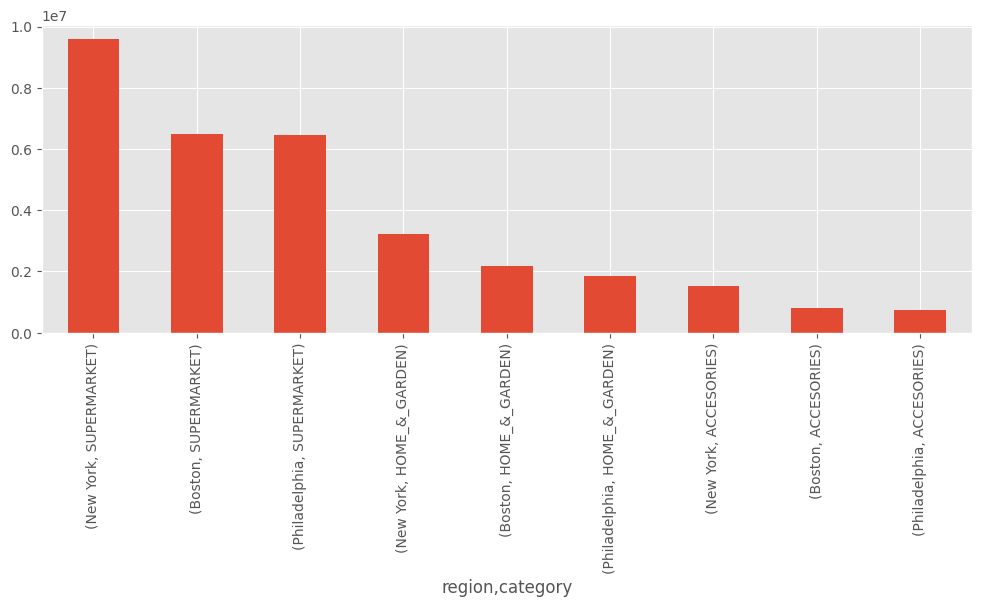

In [14]:
(
    df.
    groupby(["region","category"])
    ["unidades"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

In [23]:
top_items5= df['unidades'].groupby('store_code', group_keys=False)

In [24]:
top_items5

In [25]:
Lista_top_5 = top_items5.apply(lambda x: x.sort_values(ascending=False).head(5))

In [26]:
Lista_top_5

store_code  item             
BOS_1       SUPERMARKET_3_586     53369
            SUPERMARKET_3_090     50711
            SUPERMARKET_3_555     36031
            SUPERMARKET_3_252     28096
            SUPERMARKET_3_714     22299
BOS_2       SUPERMARKET_3_586     92088
            SUPERMARKET_3_252     61766
            SUPERMARKET_3_090     56865
            SUPERMARKET_3_555     52915
            SUPERMARKET_3_377     34112
BOS_3       SUPERMARKET_3_586     73174
            SUPERMARKET_3_090     48803
            SUPERMARKET_3_252     40747
            SUPERMARKET_3_555     39853
            SUPERMARKET_3_377     37400
NYC_1       SUPERMARKET_3_090     61768
            SUPERMARKET_3_586     47475
            SUPERMARKET_3_252     34359
            SUPERMARKET_3_120     30443
            SUPERMARKET_3_714     27827
NYC_2       SUPERMARKET_3_252     31253
            SUPERMARKET_3_586     30777
            SUPERMARKET_3_090     25732
            SUPERMARKET_3_555     15210
          

In [27]:
Lista_bott_5 = top_items5.apply(lambda x: x.sort_values(ascending=False).tail(5))

In [28]:
Lista_bott_5

store_code  item               
BOS_1       HOME_&_GARDEN_2_101    13
            HOME_&_GARDEN_2_338    13
            HOME_&_GARDEN_2_307    12
            ACCESORIES_2_025       11
            ACCESORIES_2_077       10
BOS_2       SUPERMARKET_3_220      21
            HOME_&_GARDEN_2_334    20
            HOME_&_GARDEN_2_101    19
            ACCESORIES_2_021       18
            SUPERMARKET_2_209       9
BOS_3       SUPERMARKET_3_472      15
            SUPERMARKET_2_259      15
            SUPERMARKET_2_069      14
            ACCESORIES_1_217       13
            SUPERMARKET_2_071       8
NYC_1       HOME_&_GARDEN_2_230    22
            ACCESORIES_2_015       22
            SUPERMARKET_3_296      22
            HOME_&_GARDEN_1_378    14
            ACCESORIES_1_026       12
NYC_2       SUPERMARKET_1_079      15
            SUPERMARKET_2_090      14
            SUPERMARKET_2_337      14
            SUPERMARKET_2_117       9
            SUPERMARKET_3_778       9
NYC_3       HOME_&

In [29]:
unidades_total = df.groupby(["year", "month"])["unidades"].sum()

<Axes: xlabel='year,month'>

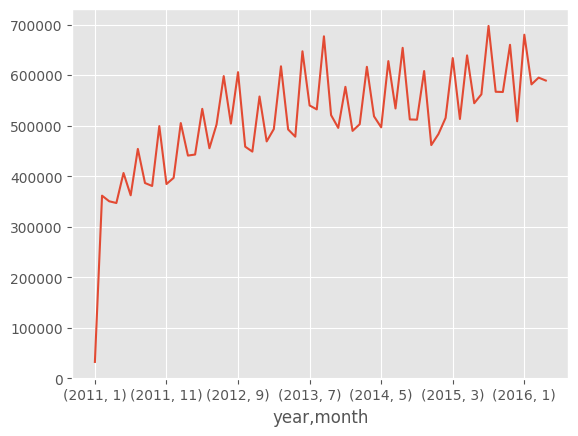

In [30]:
unidades_total.plot()

In [31]:
delta_precio = df.groupby(["year", "month"])["precio_imputado"].mean()

<Axes: xlabel='year,month'>

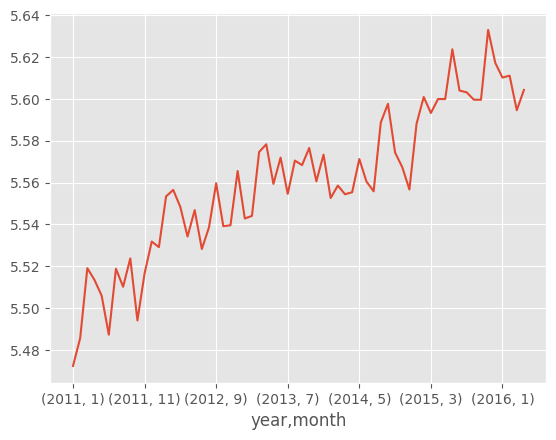

In [32]:
delta_precio.plot()

In [35]:
df["item"].describe()

count               4177130
unique                 3049
top       SUPERMARKET_2_179
freq                   1472
Name: item, dtype: object

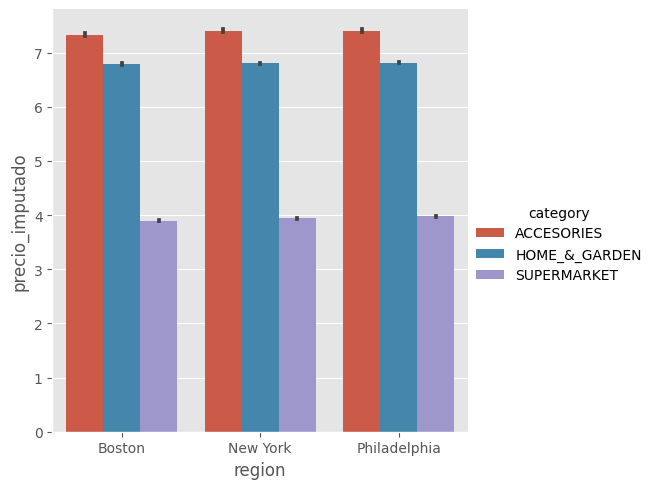

In [36]:
sns.catplot(x="region", y="precio_imputado", hue="category", kind="bar", data=df)

<Axes: xlabel='precio_imputado'>

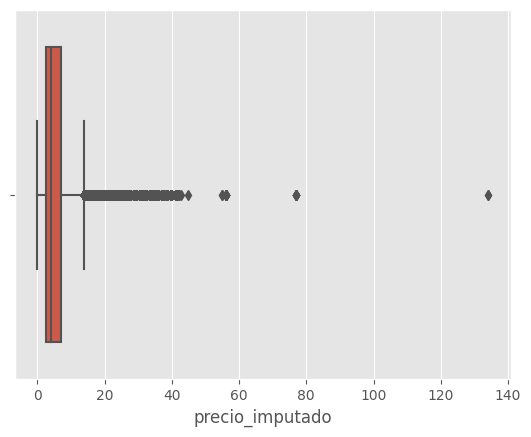

In [39]:
sns.boxplot(df, x="precio_imputado")

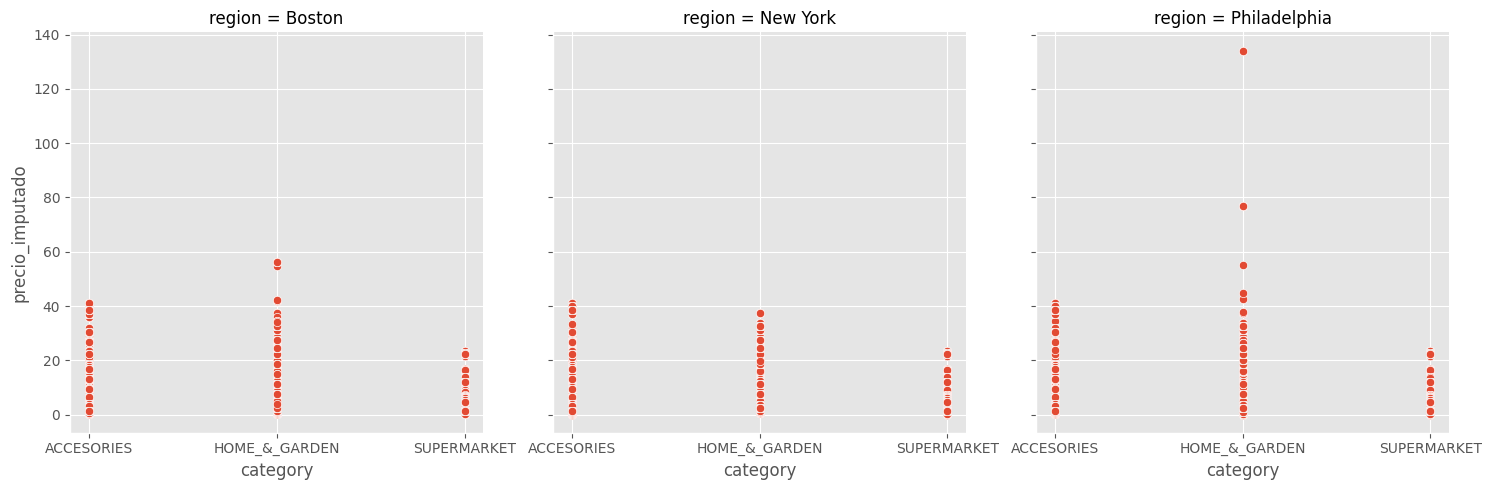

In [41]:
sns.relplot(
    data = df,
    x = "category", y = "precio_imputado", col = "region",
)

In [44]:
df[df["precio_imputado"]>100]

,id,item,category,department,store,store_code,region,date,unidades,event,year,yearweek,month,precio_imputado,ganancias_semana
2057485,HOME_&_GARDEN_2_406_PHI_3,HOME_&_GARDEN_2_406,HOME_&_GARDEN,HOME_&_GARDEN_2,Queen_Village,PHI_3,Philadelphia,2013-05-26,1,0,2013,201320,5,134.15,134.15
2057486,HOME_&_GARDEN_2_406_PHI_3,HOME_&_GARDEN_2_406,HOME_&_GARDEN,HOME_&_GARDEN_2,Queen_Village,PHI_3,Philadelphia,2013-06-09,1,0,2013,201322,6,134.15,134.15


In [45]:
df[df["item"]=="HOME_&_GARDEN_2_406"]["precio_imputado"].value_counts()

precio_imputado
15.57     827
15.59     498
76.83       8
30.88       6
4.07        6
16.09       4
134.15      2
4.34        1
12.46       1
44.85       1
28.55       1
54.99       1
Name: count, dtype: int64

In [69]:
df[df["precio_imputado"]>45]

,id,item,category,department,store,store_code,region,date,unidades,event,year,yearweek,month,precio_imputado,ganancias_semana
2057307,HOME_&_GARDEN_2_406_PHI_2,HOME_&_GARDEN_2_406,HOME_&_GARDEN,HOME_&_GARDEN_2,Yorktown,PHI_2,Philadelphia,2012-03-11,0,0,2012,201210,3,54.99,0.00
2057326,HOME_&_GARDEN_2_406_PHI_2,HOME_&_GARDEN_2_406,HOME_&_GARDEN,HOME_&_GARDEN_2,Yorktown,PHI_2,Philadelphia,2012-10-14,1,0,2012,201241,10,76.83,76.83
2057327,HOME_&_GARDEN_2_406_PHI_2,HOME_&_GARDEN_2_406,HOME_&_GARDEN,HOME_&_GARDEN_2,Yorktown,PHI_2,Philadelphia,2012-10-28,0,0,2012,201243,10,76.83,0.00
2057328,HOME_&_GARDEN_2_406_PHI_2,HOME_&_GARDEN_2_406,HOME_&_GARDEN,HOME_&_GARDEN_2,Yorktown,PHI_2,Philadelphia,2012-11-04,0,0,2012,201244,11,76.83,0.00
2057329,HOME_&_GARDEN_2_406_PHI_2,HOME_&_GARDEN_2_406,HOME_&_GARDEN,HOME_&_GARDEN_2,Yorktown,PHI_2,Philadelphia,2012-11-11,0,0,2012,201245,11,76.83,0.00
2057330,HOME_&_GARDEN_2_406_PHI_2,HOME_&_GARDEN_2_406,HOME_&_GARDEN,HOME_&_GARDEN_2,Yorktown,PHI_2,Philadelphia,2012-11-25,0,1,2012,201247,11,76.83,0.00
2057331,HOME_&_GARDEN_2_406_PHI_2,HOME_&_GARDEN_2_406,HOME_&_GARDEN,HOME_&_GARDEN_2,Yorktown,PHI_2,Philadelphia,2012-12-09,0,0,2012,201249,12,76.83,0.00
2057332,HOME_&_GARDEN_2_406_PHI_2,HOME_&_GARDEN_2_406,HOME_&_GARDEN,HOME_&_GARDEN_2,Yorktown,PHI_2,Philadelphia,2012-12-30,0,0,2012,201252,12,76.83,0.00
2057333,HOME_&_GARDEN_2_406_PHI_2,HOME_&_GARDEN_2_406,HOME_&_GARDEN,HOME_&_GARDEN_2,Yorktown,PHI_2,Philadelphia,2013-01-06,0,1,2013,201300,1,76.83,0.00
2057485,HOME_&_GARDEN_2_406_PHI_3,HOME_&_GARDEN_2_406,HOME_&_GARDEN,HOME_&_GARDEN_2,Queen_Village,PHI_3,Philadelphia,2013-05-26,1,0,2013,201320,5,134.15,134.15


In [70]:
len(df[df["precio_imputado"]>45])

23

In [71]:
df[df["precio_imputado"]>45]["unidades"].sum()

4

In [72]:
df[df["item"]=="HOME_&_GARDEN_2_466"]["precio_imputado"].value_counts()

precio_imputado
8.71     1313
8.07       52
7.46       18
21.02       7
56.10       6
56.05       5
34.54       2
41.92       2
42.15       2
54.80       1
36.05       1
34.21       1
Name: count, dtype: int64

In [50]:
df[df["id"]=="HOME_&_GARDEN_2_466_BOS_1"]["precio_imputado"].value_counts()

precio_imputado
8.71     119
21.02      7
56.10      6
8.07       6
56.05      5
34.54      2
41.92      2
42.15      2
54.80      1
36.05      1
34.21      1
Name: count, dtype: int64

In [65]:
df[(df["item"]=="HOME_&_GARDEN_2_466") & (df["store_code"]!="BOS_1")]["precio_imputado"].value_counts()

precio_imputado
8.71    1194
8.07      46
7.46      18
Name: count, dtype: int64

In [67]:
df[(df["item"]=="HOME_&_GARDEN_2_406") & (df["store_code"]!="PHI_2") & (df["store_code"]!="PHI_3")]["precio_imputado"].value_counts()


precio_imputado
15.57    666
15.59    409
4.34       1
12.46      1
44.85      1
Name: count, dtype: int64

Se decide quitar los outliers en precio imputado de mayor de 45 luego de revisar dataset original de precios y constatar que representan solo cuatro unidades vendidas.

In [76]:
df.drop(df[df["precio_imputado"] > 45].index, inplace=True)

In [78]:
df.reset_index(drop=True, inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177107 entries, 0 to 4177106
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                object        
 1   item              object        
 2   category          object        
 3   department        object        
 4   store             object        
 5   store_code        object        
 6   region            object        
 7   date              datetime64[ns]
 8   unidades          int64         
 9   event             int64         
 10  year              int64         
 11  yearweek          int64         
 12  month             int64         
 13  precio_imputado   float64       
 14  ganancias_semana  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(7)
memory usage: 478.0+ MB


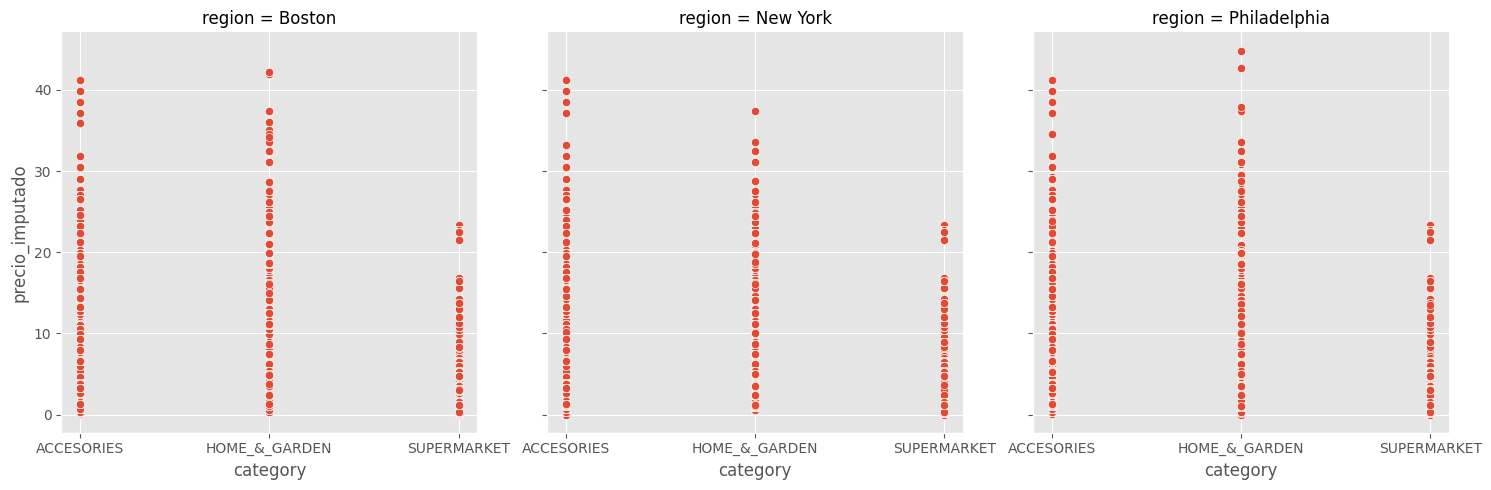

In [80]:
sns.relplot(
    data = df,
    x = "category", y = "precio_imputado", col = "region",
)

In [87]:
df[df["precio_imputado"]<0]

,id,item,category,department,store,store_code,region,date,unidades,event,year,yearweek,month,precio_imputado,ganancias_semana


In [86]:
df[df["item"]=="SUPERMARKET_3_007"]["precio_imputado"].value_counts()

precio_imputado
0.24    1320
0.30      29
0.06       5
0.10       4
0.12       3
0.19       3
0.08       2
Name: count, dtype: int64

In [88]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,4177107,2013-09-11 13:51:54.237389056,2011-01-30 00:00:00,2012-05-20 00:00:00,2013-09-15 00:00:00,2015-01-04 00:00:00,2016-04-24 00:00:00,NaN
unidades,"4,177,107.00",7.86,0.00,0.00,2.00,7.00,"3,976.00",23.58
event,"4,177,107.00",0.09,0.00,0.00,0.00,0.00,1.00,0.29
year,"4,177,107.00","2,013.21","2,011.00","2,012.00","2,013.00","2,015.00","2,016.00",1.53
yearweek,"4,177,107.00","201,346.05","201,104.00","201,220.00","201,336.00","201,500.00","201,616.00",151.68
month,"4,177,107.00",6.34,1.00,3.00,6.00,9.00,12.00,3.46
precio_imputado,"4,177,107.00",5.56,0.01,2.62,4.18,7.18,44.85,4.54
ganancias_semana,"4,177,107.00",27.63,0.00,0.00,7.90,30.10,"6,968.46",69.35


In [89]:
datasetsemana2 = df.to_csv("data\datasetsemana2.csv")